In [2]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
from skimage.filters import gaussian

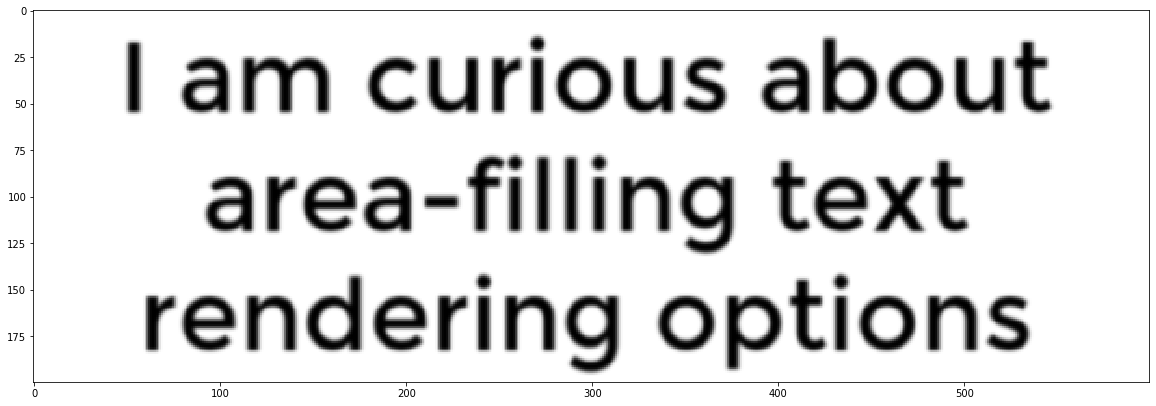

In [15]:
image=imread('images.png')

gray_img = rgb2gray(image)

#blur the image to remove any noise
blurred_gray_img = gaussian(gray_img)
plt.figure(figsize=(20,20))
#plt.axis("off")
plt.imshow(blurred_gray_img, cmap="gray")

In [13]:
import matplotlib.patches as mpatches
from skimage.measure import label, regionprops
from skimage.util import invert
from scipy.spatial.distance import euclidean

131


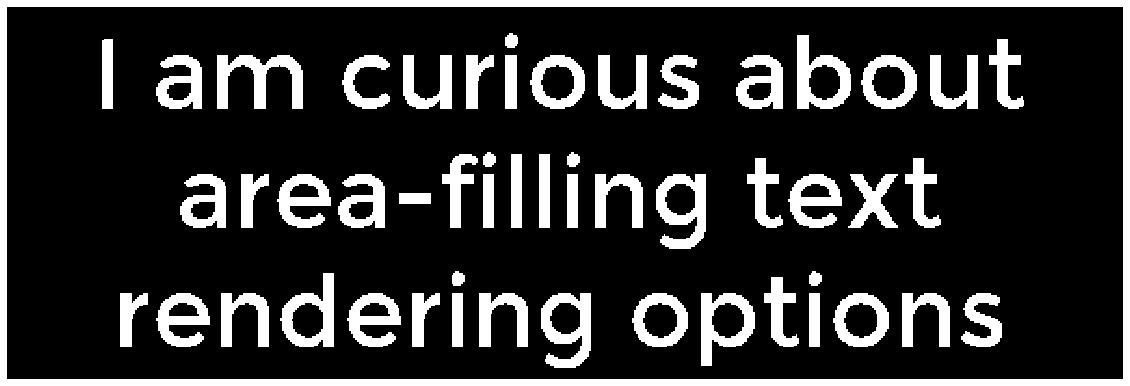

In [17]:
thresh = threshold_otsu(gray_img)
print(thresh)
thresh = 131
binary = invert(gray_img > thresh)

plt.figure(figsize=(20,20))
plt.axis("off")
plt.imshow(binary, cmap="gray")

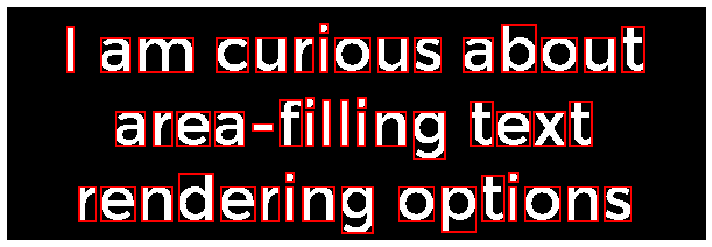

In [19]:
import numpy as np
from skimage.draw import polygon_perimeter
    

label_image = label(binary, connectivity=2)

fig, ax = plt.subplots(figsize=(10, 6))
ax.axis("off")
ax.imshow(binary, cmap="gray")




for region in regionprops(label_image):
    minr, minc, maxr, maxc = region.bbox
    rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)

plt.tight_layout()
plt.show()